In [9]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.color import rgb2gray
from PIL import Image
import numpy as np
import cv2
import copy 
import math
from operator import itemgetter

[53, 83, 117, 138, 167, 427, 539] yes
[53, 56, 539, 56] here
[53, 381, 53, 56] here
[138, 350, 138, 87] here
[539, 381, 539, 56] here
[83, 350, 83, 87] here
[167, 450, 427, 450] here
[427, 381, 539, 381] here
[167, 450, 167, 381] here
[427, 450, 427, 381] here
[83, 87, 138, 87] here
[83, 381, 117, 381] here
[83, 350, 138, 350] here
[53, 381, 83, 381] here
[138, 381, 167, 381] here


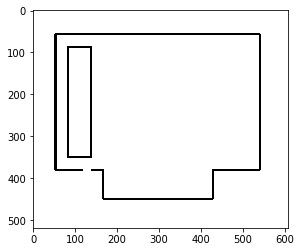

######################################################2 



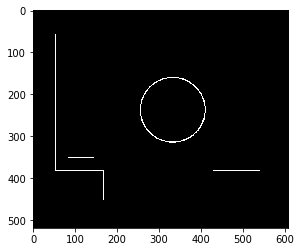

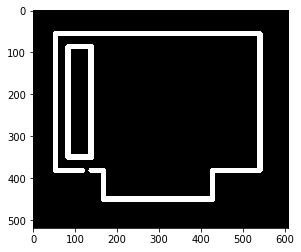

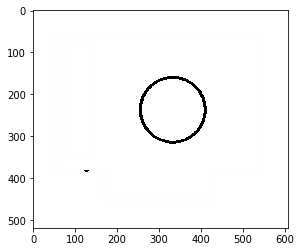

######################################################3 

######################################################4 



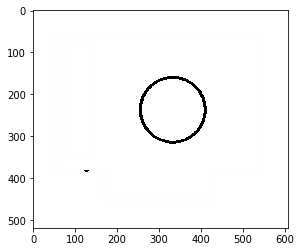

[[[332 236  81]]]
circles after break [[[332 236  81]]]
iiiiiiiiiiii [332 236  81]
style 332 236 81


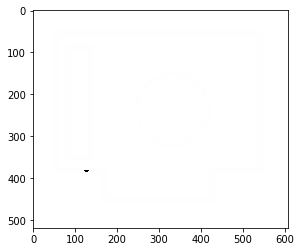

None
except
list [array([332, 236,  81], dtype=uint16)]
81


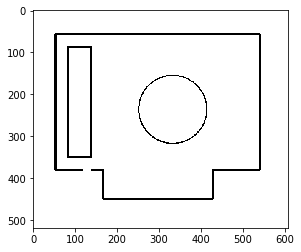

In [27]:
def same(arr1,arr2):
    r=10
    if abs(arr1[0]-arr2[0])<r and abs(arr1[1]-arr2[1])<r and abs(arr1[2]-arr2[2])<r and abs(arr1[3]-arr2[3])<r:
        return True
    else :
        return False
    
def samep(n1,n2):
    r=10
    if abs(n1-n2)<r:
        return True
    else:
        return False
    
    
def im_in(n, array):
    r=20
    for i in array:
        if abs(n-i)<r:
            return True
        
    return False
    
def connect_vertical_lines(vertical_lines):
    ShouldRemove = []
    for i in range(0,len(vertical_lines)):
        FlagOfRepetition = 0
        length = len(vertical_lines)
        for j in range(i+1,len(vertical_lines)):
            if vertical_lines[i][0] == vertical_lines[j][0]:  # They have the same x #

                if vertical_lines[i][1] <= vertical_lines[j][1] and vertical_lines[i][3] >= vertical_lines[j][3]:  # i involve j #
                    #print(str(vertical_lines[i]) + " involve " + str(vertical_lines[j]),i)
                    ShouldRemove.append(vertical_lines[j])     # we should delete j

                elif vertical_lines[i][1] >= vertical_lines[j][1] and vertical_lines[i][3] <= vertical_lines[j][3]:  # j involve i #4
                    #print(str(vertical_lines[j]) + " involve " + str(vertical_lines[i]),i)
                    ShouldRemove.append(vertical_lines[i])    # we should delete i
                    
    output=[]                
    for i in range(len(vertical_lines)):
        flag=0
        for j in range(len(ShouldRemove)):
            if(vertical_lines[i][0]==ShouldRemove[j][0] and vertical_lines[i][1]==ShouldRemove[j][1] and
              vertical_lines[i][2]==ShouldRemove[j][2] and vertical_lines[i][3]==ShouldRemove[j][3]):
                flag=1
                break
                
        if(flag==0):
            output.append(vertical_lines[i])

    return output
            
def connect_horizontal_lines(horizontal_lines):
    ShouldRemove = []
    for i in range(0,len(horizontal_lines)):
        FlagOfRepetition = 0
        length = len(horizontal_lines)
        for j in range(i+1,len(horizontal_lines)):
            if horizontal_lines[i][1] == horizontal_lines[j][1]:  # They have the same x #

                if horizontal_lines[i][0] <= horizontal_lines[j][0] and horizontal_lines[i][2] >= horizontal_lines[j][2]:  # i involve j #
                    #print(str(vertical_lines[i]) + " involve " + str(vertical_lines[j]),i)
                    ShouldRemove.append(horizontal_lines[j])     # we should delete j

                elif horizontal_lines[i][0] >= horizontal_lines[j][0] and horizontal_lines[i][2] <= horizontal_lines[j][2]:  # j involve i #4
                    #print(str(vertical_lines[j]) + " involve " + str(vertical_lines[i]),i)
                    ShouldRemove.append(horizontal_lines[i])    # we should delete i
                    
    output=[]                
    for i in range(len(horizontal_lines)):
        flag=0
        for j in range(len(ShouldRemove)):
            if(horizontal_lines[i][0]==ShouldRemove[j][0] and horizontal_lines[i][1]==ShouldRemove[j][1] and
              horizontal_lines[i][2]==ShouldRemove[j][2] and horizontal_lines[i][3]==ShouldRemove[j][3]):
                flag=1
                break
                
        if(flag==0):
            output.append(horizontal_lines[i])

    return output
                        
        
    

test = cv2.imread("test16.png")                                                       # Reading the original image
#creating a corresponding white image
white = np.zeros_like(test)                                                       
white.fill(255)
gray = cv2.cvtColor(test, cv2.COLOR_BGR2GRAY)                                         # convert fron BGR to Gray
edges = cv2.Canny(gray, 50, 200)                                                      # get the edges
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 50, minLineLength=0, maxLineGap=0)       # Detect lines


####################################################################################################################


new_lines=[]

for i in range(len(lines)):
    flag=0
    if (i!=0):
        for j in range(i):
                if same(lines[i][0],lines[j][0]):
                    flag=1
                    continue
    if(flag==0):
        line=[]
        line.append(lines[i][0][0])
        line.append(lines[i][0][1])
        line.append(lines[i][0][2])
        line.append(lines[i][0][3])
        new_lines.append(line)

        
xs=[]
ys=[]

for i in new_lines:
    xs.append(i[0])
    xs.append(i[2])
    ys.append(i[1])
    ys.append(i[3])
    
# sorting #
sorted_x=sorted(xs)
sorted_y=sorted(ys)


special_x=[]
special_y=[]


for i in sorted_x:
    if not(im_in(i, special_x)):
        special_x.append(i)
    
for i in sorted_y:
    if not(im_in(i, special_y)):
        special_y.append(i)

print(special_x,'yes')


######################################################################################################################

r=20

for i in range(len(new_lines)):
    for j in range(len(special_x)):
        if(abs(new_lines[i][0]-special_x[j])<r):
            new_lines[i][0]=special_x[j]
            break
            
    for j in range(len(special_x)):
        if(abs(new_lines[i][2]-special_x[j])<r):
            new_lines[i][2]=special_x[j]
            break
    for j in range(len(special_y)):
        if(abs(new_lines[i][1]-special_y[j])<r):
            new_lines[i][1]=special_y[j]
            break
            
    for j in range(len(special_y)):
        if(abs(new_lines[i][3]-special_y[j])<r):
            new_lines[i][3]=special_y[j]
            break        
                
    
for i in range(len(new_lines)):   
    x1, y1, x2, y2 = new_lines[i]
    cv2.line(white, (x1, y1), (x2, y2), (0, 0, 0), 3)
#x1, y1, x2, y2 = new_lines[8]
#cv2.line(white, (x1, y1), (x2, y2), (255, 0, 0), 3)
for i in new_lines:
    print(i,'here')
    
    
plt.imshow(white)




#FOR FARAG's HAPPINESS  ( Thank You ^^ )
# Getting the start point #
minx=min(special_x)
maxy=max(special_y)


for i in range(len(new_lines)):
    new_lines[i][0]-=minx
    new_lines[i][2]-=minx
    
    new_lines[i][1]=maxy-new_lines[i][1]
    new_lines[i][3]=maxy-new_lines[i][3]

    
horizontal=[]
vertical_1=[]
general_line=[]

for i in new_lines:
    i.append(math.sqrt((i[0]-i[2])**2+(i[1]-i[3])**2))
    if i[0]==i[2]:                  # To Extract Vertical lines
        vertical_1.append(i)
    elif i[1]==i[3]:
        horizontal.append(i)        # To Extract Horizontal lines
    else:
        general_line.append(i)      # To Extract General lines

vertical = connect_vertical_lines(vertical_1)         # ( Connect Vertical lines first ) #
horizontal = connect_horizontal_lines(horizontal)      

#horizontal = np.array(horizontal)
#vertical = np.array(vertical_2)

# print("H",horizontal,"H")
# print("V",vertical,"V")
# print("G",general_line,"G")
# Show result             







plt.imshow(white)

plt.show()

##################################################################################################################

print('######################################################2 \n')
test=cv2.bitwise_not(test)
white2=cv2.bitwise_not(white)

plt.imshow(test)
plt.show()


white2 = cv2.dilate(white2,cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(9,9)),iterations = 1)
plt.imshow(white2)
plt.show()

output=test-white2

output = cv2.dilate(output,cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)),iterations = 1)

output=cv2.bitwise_not(output)


plt.imshow(output)
plt.show()


print('######################################################3 \n')
def det_circles(img):
    
    img = cv2.medianBlur(img,5)
    circles=[]
    try:
        circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,
                1,100,param1=50, param2=30, minRadius=0,maxRadius=0)
        circles = np.uint16(np.around(circles))
    except:
        pass
    return circles



    
print('######################################################4 \n')
list_circles=[]
kernal=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(9,9))




#output=cv2.imread('circles1.png')

plt.imshow(output)
plt.show()



while(1):
    
    gray = cv2.cvtColor(output, cv2.COLOR_BGR2GRAY)
    circles=det_circles(gray)
    print(circles)
    
    try:
        if(len(circles)==0  or circles[0][0][2]==0):
            print('try')
            break
    except:
        print('except')
        break
    
    print('circles after break', circles)
    for i in circles[0]:
        print('iiiiiiiiiiii',i)
        list_circles.append(i)
        
    #creating a corresponding white image
    white_new = np.zeros_like(test)                                                       
    white_new.fill(255)
    
    for i in circles[0,:4]:
        print('style',i[0],i[1],i[2])
        cv2.circle(white_new,(i[0],i[1]),i[2],(0,0,0),2)

    test=cv2.bitwise_not(output)
    white2=cv2.bitwise_not(white_new)
    white2 = cv2.dilate(white2,cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(17,17)),iterations = 1)
    output=test-white2
    output=cv2.bitwise_not(output)
    plt.imshow(output)
    plt.show()

# output = cv2.cvtColor(output, cv2.COLOR_BGR2GRAY)
# ret,output = cv2.threshold(output,100,255,cv2.THRESH_BINARY)

# plt.imshow(output, cmap='gray')
# plt.show()

# circles2=det_circles(output)
# print('2222',circles2)
# list_circles.append(circles2)


print('list', list_circles)

for j in list_circles:
    #for i in range(3):
    # #Getting The Centre
    # x = i[0]
    # y = i[1]
    #
    # #Getting The Radius
    # r = i[2]
    #draw the outer circle
    cv2.circle(white,(j[0],j[1]),j[2],(0,0,0),2)
    #draw the center of the circle
    #cv2.circle(white,(i[0],i[1]),2,(0,0,255),3)
    print (j[2])

        
        
for j in range(len(list_circles)):
    list_circles[j][0]-=minx
    list_circles[j][1]=maxy-list_circles[j][1]




plt.imshow(white)






In [28]:
horizontal=sorted(horizontal, key = itemgetter(4))
print(horizontal)

[[85, 69, 114, 69, 29.0], [0, 69, 30, 69, 30.0], [30, 69, 64, 69, 34.0], [30, 363, 85, 363, 55.0], [30, 100, 85, 100, 55.0], [374, 69, 486, 69, 112.0], [114, 0, 374, 0, 260.0], [0, 394, 486, 394, 486.0]]


In [33]:
from dxfwrite import DXFEngine as dxf
from dxfwrite.dimlines import dimstyles, LinearDimension ,RadialDimension
import math
import numpy as np

# Number of colors #
Red=1
Yellow=2
Green=3
Labny=4
Blue=5
Foshia=6
White=7
theta=0


class shapes:
    

    drawing = ''

    def __init__(self,fileName):
        self.drawing = dxf.drawing(fileName + '.dxf')



    def text(self,text,x,y,color = Foshia):
        text = dxf.text(text, (x, y), height=0.3, rotation=0)
        text['layer'] = 'TEXT'
        text['color'] = color
        self.drawing.add(text)
        self.drawing.save()

    def line_with_NO_dims(self,x1, y1, x2, y2,color = White):
        line = dxf.line((x1, y1), (x2, y2))
        line['color'] = color
        self.drawing.add(line)
        self.drawing.save()

    def Horizontal_line_with_under_dims(self,x1, y1, x2, y2,length,color = White):
        line = dxf.line((x1, y1), (x2, y2))
        line['color'] = color
        self.drawing.add(line)

        dimstyles.setup(self.drawing)

        points = [(x1, y1 + 0.3), (x2, y1 + 0.3)]  # mn hna bt7dd x bta3 al point   # al y = height of blue line

        dimstyles.new("arrow", tick="DIMTICK_ARROW",height=0.2, tick2x=True, dimlineext=0.)

        # The angle control the slope of line
        Theta = math.atan((y1 - y2) / (x1 - x2))
        Theta = math.degrees(Theta)
        self.drawing.add(
            LinearDimension((10, y1 - length/300), points, dimstyle='arrow', angle=Theta))  # mn hna bt7dd y bta3 al point
        # drawing.set_text(1, 'CATCH')
        self.drawing.save()

    def Horizontal_line_with_upper_dims(self,x1, y1, x2, y2,color = White):
        line = dxf.line((x1, y1), (x2, y2))
        line['color'] = color
        self.drawing.add(line)

        dimstyles.setup(self.drawing)

        points = [(x1, y1 ), (x2, y1 )]  # mn hna bt7dd x bta3 al point   # al y = height of blue line

        dimstyles.new("arrow", tick="DIMTICK_ARROW",height=0.2, tick2x=True, dimlineext=0.)

        # The angle control the slope of line
        Theta = math.atan((y1 - y2) / (x1 - x2))
        Theta = math.degrees(Theta)
        self.drawing.add(
            LinearDimension((10, y1 + 0.5), points, dimstyle='arrow', angle=Theta))  # mn hna bt7dd y bta3 al point
        # drawing.set_text(1, 'CATCH')
        self.drawing.save()

    def vertical_line_with_left_dims(self,x1, y1, x2, y2,color = White):
        line = dxf.line((x1, y1), (x2, y2))
        line['color'] = color
        self.drawing.add(line)

        dimstyles.setup(self.drawing)

        points = [(x1 + 0.3 , y1), (x1 + 0.3, y2)]  # mn hna bt7dd y bta3 al point   # al x = height of blue line

        dimstyles.new("arrow", tick="DIMTICK_ARROW",height=0.2, tick2x=True, dimlineext=0.)


        self.drawing.add(
            LinearDimension((x1 - 1 , 7), points, dimstyle='arrow', angle=90))  # mn hna bt7dd x bta3 al point

        self.drawing.save()

    def vertical_line_with_right_dims(self,x1, y1, x2, y2,length,color = White):
        line = dxf.line((x1, y1), (x2, y2))
        line['color'] = color
        self.drawing.add(line)

        dimstyles.setup(self.drawing)

        points = [(x1-0.3 , y1), (x1-0.3 , y2)]  # mn hna bt7dd y bta3 al point   # al x = height of blue line

        dimstyles.new("arrow", tick="DIMTICK_ARROW",height=0.2, tick2x=True, dimlineext=0.)


        self.drawing.add(
            LinearDimension((x1 + length/300 , 7), points, dimstyle='arrow', angle=90))  # mn hna bt7dd x bta3 al point

        self.drawing.save()

    def circle_with_NO_dims(self, r, x, y,color = White):
        circle = dxf.circle(r, (x, y))
        circle['color'] = color
        self.drawing.add(circle)

        self.drawing.save()

    def circle_with_dims(self,r, x, y,color = White):
        global theta
        
        circle = dxf.circle(r, (x, y))
        circle['color'] = color
        self.drawing.add(circle)

        dimstyles.setup(self.drawing)
        dimstyles.new("radius", height=0.2, prefix='R=')

        self.drawing.add(RadialDimension((x, y), (x+r*np.sin(theta), y + r*np.cos(theta)), dimstyle='radius'))
        self.drawing.save()
        theta=(theta+0.6)%6

    def arc(self,r,x,y,Theta1,Theta2,color = White):
        arc = dxf.arc(r, (x, y), Theta1, Theta2)
        arc['color'] = color
        self.drawing.add(arc)
        self.drawing.save()

    def rectangle(self,x,y,width,height,color = White):
        # (x,y) is the top right point of the rectangle

        s.line_with_NO_dims(x-width, y-height, x, y-height,color)
        s.line_with_NO_dims(x, y-height, x, y,color)
        s.line_with_NO_dims(x-width, y-height, x-width, y,color)
        s.line_with_NO_dims(x-width, y, x, y,color)

    def dashed_line(self,x1,y1,x2,y2,color = Red):  # The dashed line should be vertical or horizontal only
        if x1 == x2:                            # vertical dashed line
            array = np.arange(y1, y2, 0.001)
            count = 0
            for y in array:
                if count <= 100:
                    point = dxf.point((x1,y))
                    point['color'] = color
                    self.drawing.add(point)
                    count = count + 1
                else:
                    if count == 160:
                        count = 0
                    else:
                        count = count + 1

        elif y1 == y2:                          # Horizontal dashed line
            array = np.arange(x1, x2, 0.001)
            count = 0
            for x in array:
                if count <= 100:
                    point = dxf.point((x, y1))
                    point['color'] = color
                    self.drawing.add(point)
                    count = count + 1
                else:
                    if count == 160:
                        count = 0
                    else:
                        count = count + 1
        self.drawing.save()




# This main is only for Testing #
if __name__ == '__main__':
    s = shapes("proposal_shape")
    #s.circle_with_dims(2,3,5,Blue)


     #Ex1: Tesing all shpes I have till Now #

    # s.line_with_NO_dims(1,1,2,2)
    # s.Horizontal_line_with_under_dims(2,3,5,3)
    # s.Horizontal_line_with_upper_dims(2,5,5,5)
    # s.vertical_line_with_left_dims(10,2,10,8,Blue)
    # s.vertical_line_with_right_dims(13,2,13,8)
    # s.circle_with_NO_dims(2,17,6.5,Yellow)
    # s.circle_with_dims(2,17,2)
    # s.arc(1.2,5.6,2.4,30.5,90.9)




     #EX2: trying to draw the proposal shape #
    
    factor = 50
    # s.text("Elevation",6.7,-0.5)
    #[[57, 58, 318, 58, 261.0], [57, 145, 318, 145, 261.0], [0, 0, 385, 0, 385.0]]
    horizontal=sorted(horizontal, key = itemgetter(4))
    
    if(len(horizontal)==1):
        s.Horizontal_line_with_under_dims(horizontal[0][0]/factor, horizontal[0][1]/factor, horizontal[0][2]/factor, horizontal[0][3]/factor,horizontal[0][4],Green)
    
    if(len(horizontal)>1 and (horizontal[0][4]!=horizontal[1][4])):
        s.Horizontal_line_with_under_dims(horizontal[0][0]/factor, horizontal[0][1]/factor, horizontal[0][2]/factor, horizontal[0][3]/factor,horizontal[0][4],Green)
    
    for i in range (1,len(horizontal)):
        if(horizontal[i][4]==horizontal[i-1][4]):
            if(horizontal[i][1]<horizontal[i-1][1]):   
                s.Horizontal_line_with_under_dims(horizontal[i][0]/factor, horizontal[i][1]/factor, horizontal[i][2]/factor, horizontal[i][3]/factor,horizontal[i][4],Green)
                s.line_with_NO_dims(horizontal[i-1][0]/factor, horizontal[i-1][1]/factor, horizontal[i-1][2]/factor, horizontal[i-1][3]/factor,Green)
            else:
                s.line_with_NO_dims(horizontal[i][0]/factor, horizontal[i][1]/factor, horizontal[i][2]/factor, horizontal[i][3]/factor,Green)
                s.Horizontal_line_with_under_dims(horizontal[i-1][0]/factor, horizontal[i-1][1]/factor, horizontal[i-1][2]/factor, horizontal[i-1][3]/factor,horizontal[i-1][4],Green)
        elif(i==len(horizontal)-1):
            s.Horizontal_line_with_under_dims(horizontal[i][0]/factor, horizontal[i][1]/factor, horizontal[i][2]/factor, horizontal[i][3]/factor,horizontal[i][4],Green)
            
        elif(horizontal[i][4]!=horizontal[i-1][4] and horizontal[i][4]!=horizontal[i+1][4]):
            s.Horizontal_line_with_under_dims(horizontal[i][0]/factor, horizontal[i][1]/factor, horizontal[i][2]/factor, horizontal[i][3]/factor,horizontal[i][4],Green)
    
    
    
    vertical=sorted(vertical, key = itemgetter(4))
    if(len(vertical)==1):
        s.vertical_line_with_right_dims(vertical[0][0]/factor, vertical[0][1]/factor, vertical[0][2]/factor, vertical[0][3]/factor,vertical[0][4],Green)
    if(len(vertical)>1 and (vertical[0][4]!=vertical[1][4])):
        s.vertical_line_with_right_dims(vertical[0][0]/factor, vertical[0][1]/factor, vertical[0][2]/factor, vertical[0][3]/factor,vertical[0][4],Green)
    for i in range (1,len(vertical)):
        if(vertical[i][4]==vertical[i-1][4]):
            if(vertical[i][0]>vertical[i-1][0]):   
                s.vertical_line_with_right_dims(vertical[i][0]/factor, vertical[i][1]/factor, vertical[i][2]/factor, vertical[i][3]/factor,vertical[i][4],Green)
                s.line_with_NO_dims(vertical[i-1][0]/factor, vertical[i-1][1]/factor, vertical[i-1][2]/factor, vertical[i-1][3]/factor,Green)
            else:
                s.line_with_NO_dims(vertical[i][0]/factor, vertical[i][1]/factor, vertical[i][2]/factor, vertical[i][3]/factor,Green)
                s.vertical_line_with_right_dims(vertical[i-1][0]/factor, vertical[i-1][1]/factor, vertical[i-1][2]/factor, vertical[i-1][3]/factor,vertical[i-1][4],Green)
        elif(i==len(vertical)-1):
            s.vertical_line_with_right_dims(vertical[i][0]/factor, vertical[i][1]/factor, vertical[i][2]/factor, vertical[i][3]/factor,vertical[i][4],Green)
            
        elif(vertical[i][4]!=vertical[i-1][4] and vertical[i][4]!=vertical[i+1][4]):
            s.vertical_line_with_right_dims(vertical[i][0]/factor, vertical[i][1]/factor, vertical[i][2]/factor, vertical[i][3]/factor,vertical[i][4],Green)
            
    
    for i in general_line:
        s.line_with_dims(i[0]/factor, i[1]/factor, i[2]/factor, i[3]/factor,Green)
    
    for j in list_circles:
        s.circle_with_dims(j[2]/factor, j[0]/factor, j[1]/factor,Green)
        print (j[2]/factor)

    #s.Horizontal_line_with_under_dims( 0, 21.2, 45.5, 21.2)
    #s.vertical_line_with_right_dims( 0,   0,   0, 21.2)
    #s.vertical_line_with_left_dims(45.5,   0, 45.5, 21.2)
    #
    #
    #
    # s.rectangle(9.5,3,4,1)
    # s.arc(2.5,7.5,6,0,180)
    #
    # s.circle_with_NO_dims(1.5,7.5,6)


     #EX3: trying to detect circles
    #s.circle_with_NO_dims(2, 2, 2)        # 1
    #s.circle_with_NO_dims(2,7.5 ,2 )      # 2
    #s.circle_with_dims(1.5, 7.5, 6)       # 3
    #s.circle_with_NO_dims(1, 2, 6)        # 4
    

1.62
